# Daily Confirmed Cases and 5-day Moving Average of different Indian States

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from matplotlib.dates import DateFormatter

In [2]:
# Getting the state-wise daily data 
StateDailydf = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
StateDailydf.fillna(0, inplace=True)
StateDailydf

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,0,1,3,0,1,1,0,12,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,18-May-20,Recovered,2482,0,96,0,0,44,3,0,...,0,181,163,0,234,10,4,147,0,47
197,18-May-20,Deceased,131,0,0,0,2,1,0,0,...,0,2,7,0,3,0,0,6,0,6
198,19-May-20,Confirmed,5340,0,57,0,42,96,3,5,...,5,22,338,0,688,42,8,321,15,137
199,19-May-20,Recovered,3032,0,69,0,0,0,3,0,...,1,95,119,0,489,9,27,135,0,68


In [3]:
# Setting start and latest date
dfshape = StateDailydf.shape
BeginDate = datetime.strptime(StateDailydf['Date'][0],'%d-%b-%y').strftime("%d %B %Y")
EndDate = datetime.strptime(StateDailydf['Date'][dfshape[0]-1],'%d-%b-%y').strftime("%d %B %Y")
print(BeginDate)
print(EndDate)

14 March 2020
19 May 2020


In [4]:
# Creating a dictionary for State codes as mentioned in above dataset
statesUT = {
    'TT': 'India',
    'AN':'Andaman and Nicobar Islands',
    'AP':'Andhra Pradesh',
    'AR':'Arunachal Pradesh',
    'AS':'Assam',
    'BR':'Bihar',
    'CH':'Chandigarh',
    'CT':'Chhattisgarh',
    'DN':'Dadra and Nagar Haveli',
    'DD':'Daman and Diu',
    'DL':'Delhi',
    'GA':'Goa',
    'GJ':'Gujarat',
    'HR':'Haryana',
    'HP':'Himachal Pradesh',
    'JK':'Jammu and Kashmir',
    'JH':'Jharkhand',
    'KA':'Karnataka',
    'KL':'Kerala',
    'LA':'Ladakh',
    'LD':'Lakshadweep',
    'MP':'Madhya Pradesh',
    'MH':'Maharashtra',
    'MN':'Manipur',
    'ML':'Meghalaya',
    'MZ':'Mizoram',
    'NL':'Nagaland',
    'OR':'Odisha',
    'PY':'Puducherry',
    'PB':'Punjab',
    'RJ':'Rajasthan',
    'SK':'Sikkim',
    'TN':'Tamil Nadu',
    'TG':'Telangana',
    'TR':'Tripura',
    'UP':'Uttar Pradesh',
    'UT':'Uttarakhand',
    'WB':'West Bengal'
}

In [5]:
# Function to get 'confirmed' cases of a particular state from main dataset and making its 5 - day moving average
def fetchstate(state):
    
    Dateslist = pd.date_range(BeginDate, EndDate)

    stateindex = list(statesUT.keys())[list(statesUT.values()).index(state)]
    CCdata = []
    
    for i in range(dfshape[0]):
        if StateDailydf['Status'][i] == 'Confirmed':
            CCdata.append(StateDailydf[stateindex][i])

    df = pd.DataFrame(list(CCdata),index = Dateslist, columns = ['Confirmed'])
    df['MA'] = df.iloc[:,0].rolling(window=5).mean()
    df.fillna(0, inplace = True)
    print(state)
    print(df)
    return df

In [6]:
# Function plots the data in columns of 3 of list of states passed as parameter
def PlotConfirmandMA(loc):

    noc = len(loc)
    nor = math.ceil(noc/3)
    
    fig, axes = plt.subplots(nrows = nor, ncols = 3, figsize = (25,18))
    fig.suptitle('Confirmed cases and 5-day Moving Average in India and its states as of ' + EndDate, fontsize = 20)
    plt.subplots_adjust(hspace = .4)
    
    k = 0
    for i in range(nor):
        for j in range(3):
            if k < noc:
                StateData = fetchstate(loc[k])
                
                axes[i,j].bar(StateData.index, StateData['Confirmed'], color = 'cyan', width = 1, edgecolor = 'gray', linewidth = 0.05, label = 'Daily Confirmed Cases')
                axes[i,j].plot(StateData.index, StateData['MA'], color = 'blue', linestyle = '-', linewidth = 1,label = '5-Day Moving Average')
                axes[i,j].plot(StateData.index[-1], StateData['MA'][-1], color = 'blue', marker='o', markerfacecolor='blue', markersize=5)
                
                axes[i,j].set_title(loc[k] + ' (Total cases: ' + str(int(StateData['Confirmed'].sum())) + ')', 
                                    y = 1, fontsize = 15, fontweight='bold')
                
                axes[i,j].grid(axis = 'y', alpha = 0.5)
                
                myFmt = DateFormatter("%d-%b")
                axes[i,j].xaxis.set_major_formatter(myFmt)
                
                axes[i,j].spines['top'].set_visible(False)
                axes[i,j].spines['right'].set_visible(False)
                
                if k == noc-1:
                    handles, labels = axes[i,j].get_legend_handles_labels()
                
                k = k + 1
    
    fig.legend(handles, labels, bbox_to_anchor=(0.4, 0.85), loc='upper center', ncol = 3, fontsize = 15, frameon=False)
    plt.savefig('ConfirmedandMA.png')
    
# --- Function Ends Here ---


In [7]:
list_of_states = ['India', 'Maharashtra', 'Delhi', 
                  'Uttar Pradesh', 'Kerala', 'West Bengal', 
                  'Karnataka', 'Gujarat', 'Madhya Pradesh',
                  'Bihar', 'Rajasthan', 'Andhra Pradesh',
                  'Jammu and Kashmir', 'Punjab', 'Tamil Nadu']

India
            Confirmed      MA
2020-03-14         81     0.0
2020-03-15         27     0.0
2020-03-16         15     0.0
2020-03-17         11     0.0
2020-03-18         37    34.2
...               ...     ...
2020-05-15       3787  3731.6
2020-05-16       4794  3972.0
2020-05-17       5049  4269.4
2020-05-18       4628  4449.8
2020-05-19       5340  4719.6

[67 rows x 2 columns]
Maharashtra
            Confirmed      MA
2020-03-14         14     0.0
2020-03-15         18     0.0
2020-03-16          6     0.0
2020-03-17          3     0.0
2020-03-18          3     8.8
...               ...     ...
2020-05-15       1576  1385.8
2020-05-16       1606  1461.0
2020-05-17       2347  1725.2
2020-05-18       2005  1827.2
2020-05-19       2078  1922.4

[67 rows x 2 columns]
Delhi
            Confirmed     MA
2020-03-14          7    0.0
2020-03-15          0    0.0
2020-03-16          0    0.0
2020-03-17          1    0.0
2020-03-18          2    2.0
...               ...    ...
2020-05

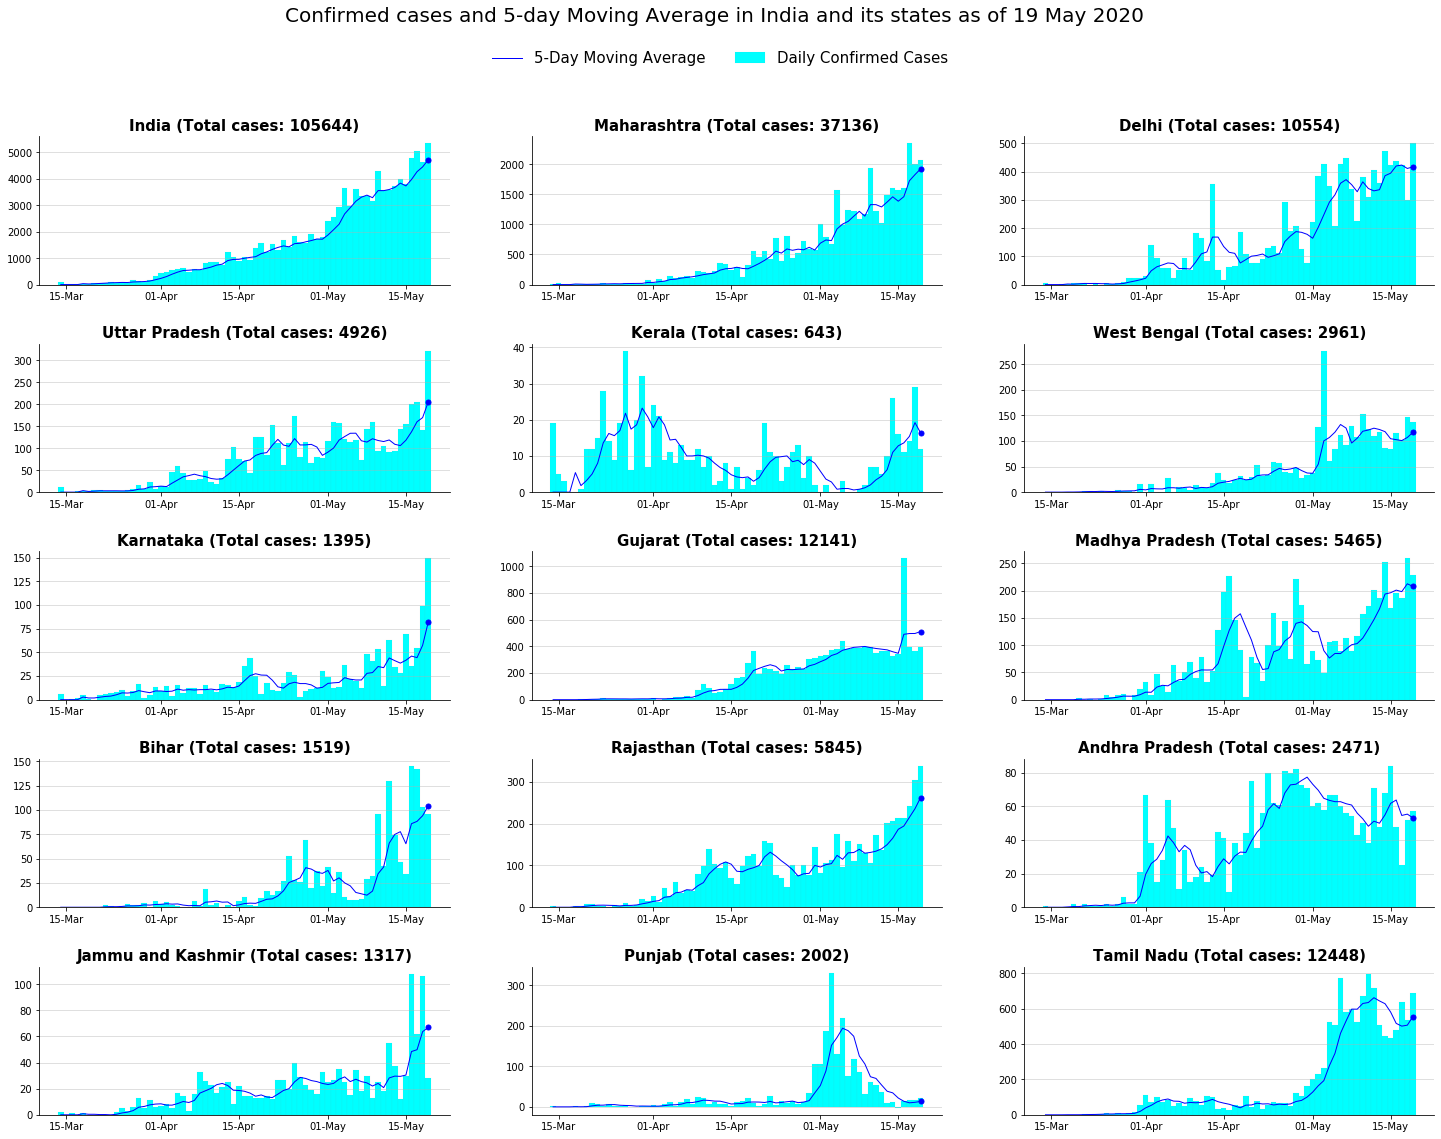

In [8]:
PlotConfirmandMA(list_of_states)